In [9]:
import pandas as pd
import sqlite3

---
## Make a connection to the database 

In [10]:
con = sqlite3.connect('../data/checking-logs.sqlite')

### Tables we have

In [11]:
pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"', con)

,name
0,pageviews
1,checker
2,deadlines


In [12]:
pd.read_sql('SELECT * FROM pageviews LIMIT 3', con)

,index,uid,datetime
0,0,admin_1,2020-04-17 12:01:08.463179
1,1,admin_1,2020-04-17 12:01:23.743946
2,2,admin_3,2020-04-17 12:17:39.287778


---
## Run a query that gets the `datetime` from the `pageviews` table, selecting only the ***users*** and ***not*** the ***admins***

In [13]:
users_datetime = pd.read_sql('SELECT datetime FROM pageviews WHERE uid LIKE "user_%"', con)
users_datetime['datetime'] = pd.to_datetime(users_datetime['datetime'])
users_datetime.head(3)

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899


---
## Using Pandas, create a new dataframe where the *visits* are counted and *grouped by date*

In [14]:
visits = users_datetime.groupby(users_datetime['datetime'].dt.date).count().rename(columns={'datetime': 'visits'})
print(len(visits))
visits.head()

33


,visits
datetime,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


---
## Using Pandas method `.plot()`, create a graph

- the ***size*** of the ***font*** should be ***8***
- the ***size*** of the ***figure*** is ***(15,8)***
- the graph must have the ***title*** `Views per day`
- pay attention to the rotation of xticks on the graph in the subject

<AxesSubplot:title={'center':'Views per day'}, xlabel='date', ylabel='views'>

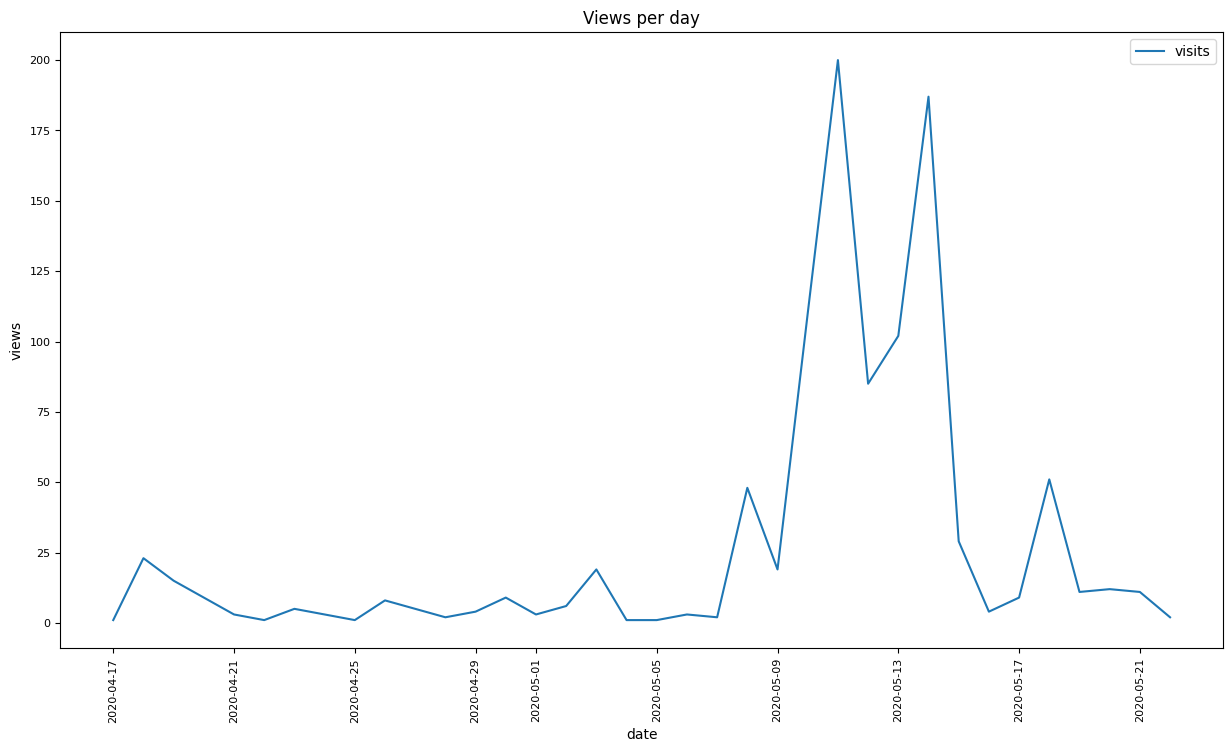

In [15]:
visits.plot(figsize=(15, 8), title='Views per day', fontsize=8, xlabel='date', ylabel='views', rot=90)

---
## Close the connection to the database

In [16]:
con.close()